In [2]:
# Import Libraries

import warnings
import numpy as np 
import pandas as pd
import plotly as py
import seaborn as sns
import statistics as stat
from datetime import date
import plotly.express as px
import plotly.graph_objs as go
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from matplotlib.ticker import FixedLocator, FixedFormatter
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Import Data

cust = pd.read_csv('F:\Learningissuccessful\Porfolio\marketing_campaign.csv', sep = '\t')

In [4]:
# Basic Information

cust.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [21]:
cust.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [33]:
cust = cust.fillna(0)
cust['Income'] = cust['Income'].astype('int64', errors='ignore')
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Family_size,Age,Collected,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,1957,Graduation,0,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,57,2014-12-07,972,1617,22,73.5,13.6,1
1,2174,1954,Graduation,0,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,3,60,2014-12-07,126,27,4,6.8,50.0,0
2,4141,1965,Graduation,0,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,49,2014-12-07,473,776,20,38.8,5.0,0
3,6182,1984,Graduation,0,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,2,30,2014-12-07,66,53,6,8.8,33.3,0
4,5324,1981,PhD,0,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,2,33,2014-12-07,322,422,14,30.1,35.7,0


In [ ]:
# Preprocessing
# Understand the family details

cust['Kids'] = cust['Kidhome'] + cust['Teenhome']

#Remake the marital

re_marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}

cust['Marital_Status'] = cust['Marital_Status'].map(re_marital)

cust['Family_size'] = 0
for i in range(len(cust)):
    if cust['Marital_Status'][i] == 'In relationship':
        cust['Family_size'][i] = 2 + cust['Kids'][i]
    else:
        cust['Family_size'][i] = 1 + cust['Kids'][i]

In [13]:
#  Highlight the age and time that a person is a client

cust['Dt_Customer'] = pd.to_datetime(cust['Dt_Customer'])
cust['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [9]:
# We will assume that the customer information was collected 2014-12-07

cust['Age'] = 2014 - cust['Year_Birth']
cust['Collected'] = '2014-12-07'
cust['Collected'] = pd.to_datetime(cust['Collected'])
cust['Days_is_client'] = (cust['Collected'] - cust['Dt_Customer']).dt.days

In [10]:
# Some more information about purchases

cust['MntTotal'] = cust['MntWines'] + cust['MntFruits'] + cust['MntMeatProducts'] + cust['MntFishProducts'] + cust['MntSweetProducts'] + cust['MntGoldProds']
cust['NumAllPurchases'] = cust['NumWebPurchases'] + cust['NumCatalogPurchases'] + cust['NumStorePurchases']
cust['AverageCheck'] = round((cust['MntTotal'] / cust['NumAllPurchases']), 1)
cust['ShareDealsPurchases'] = round((cust['NumDealsPurchases'] / cust['NumAllPurchases']) * 100, 1)
cust['TotalAcceptedCmp'] = cust['AcceptedCmp1'] + cust['AcceptedCmp2'] + cust['AcceptedCmp3'] + cust['AcceptedCmp4'] + cust['AcceptedCmp5'] + cust['Response']

In [15]:
del cust['fFmily_Size']
del cust['Family_Size']

In [28]:
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Family_size,Age,Collected,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,1957,Graduation,NaN,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,57,2014-12-07,972,1617,22,73.5,13.6,1
1,2174,1954,Graduation,NaN,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,3,60,2014-12-07,126,27,4,6.8,50.0,0
2,4141,1965,Graduation,NaN,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,49,2014-12-07,473,776,20,38.8,5.0,0
3,6182,1984,Graduation,NaN,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,2,30,2014-12-07,66,53,6,8.8,33.3,0
4,5324,1981,PhD,NaN,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,2,33,2014-12-07,322,422,14,30.1,35.7,0


In [20]:
# There are some logic errors in data, so 6 clients spent money, but did not make a single order - I will delete them.

cust = cust.query("NumAllPurchases != 0")

In [35]:
# We have missing values

cust = cust.fillna(0)
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Family_size,Age,Collected,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,1957,Graduation,0,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,57,2014-12-07,972,1617,22,73.5,13.6,1
1,2174,1954,Graduation,0,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,3,60,2014-12-07,126,27,4,6.8,50.0,0
2,4141,1965,Graduation,0,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,49,2014-12-07,473,776,20,38.8,5.0,0
3,6182,1984,Graduation,0,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,2,30,2014-12-07,66,53,6,8.8,33.3,0
4,5324,1981,PhD,0,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,2,33,2014-12-07,322,422,14,30.1,35.7,0


In [ ]:
# Remove all unnecessary columns

cust.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)

In [39]:
cust.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1
1,Graduation,0,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0
2,Graduation,0,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,1,49,473,776,20,38.8,5.0,0
3,Graduation,0,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,2,30,66,53,6,8.8,33.3,0
4,PhD,0,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,2,33,322,422,14,30.1,35.7,0


In [41]:
# Converting outliers

cust['Income'] = np.where(cust['Income'] > 120000, 120000, cust['Income'])
cust['AverageCheck'] = np.where(cust['AverageCheck'] > 200, 200, cust['AverageCheck'])
cust.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1
1,Graduation,0,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0
2,Graduation,0,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,1,49,473,776,20,38.8,5.0,0
3,Graduation,0,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,2,30,66,53,6,8.8,33.3,0
4,PhD,0,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,2,33,322,422,14,30.1,35.7,0


In [44]:
# And finally, calculate the difference between how long a person has been a client and the count of days from the last purchase

cust['ActiveDays'] = cust['Days_is_client'] - cust['Recency']

In [47]:
cust.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Family_size,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,ActiveDays
0,Graduation,0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,57,972,1617,22,73.5,13.6,1,914
1,Graduation,0,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,60,126,27,4,6.8,50.0,0,88
2,Graduation,0,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,1,49,473,776,20,38.8,5.0,0,447
3,Graduation,0,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,2,30,66,53,6,8.8,33.3,0,40
4,PhD,0,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,2,33,322,422,14,30.1,35.7,0,228


In [ ]:
### Clustering and EDA ###

In [48]:
# Clustering will be done based on average check, count of all purchases and the time that person is a client

cust_clust = cust[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()

for i in cust_clust.columns:
    cust_clust[i] = StandardScaler().fit_transform(np.array(cust_clust[[i]]))

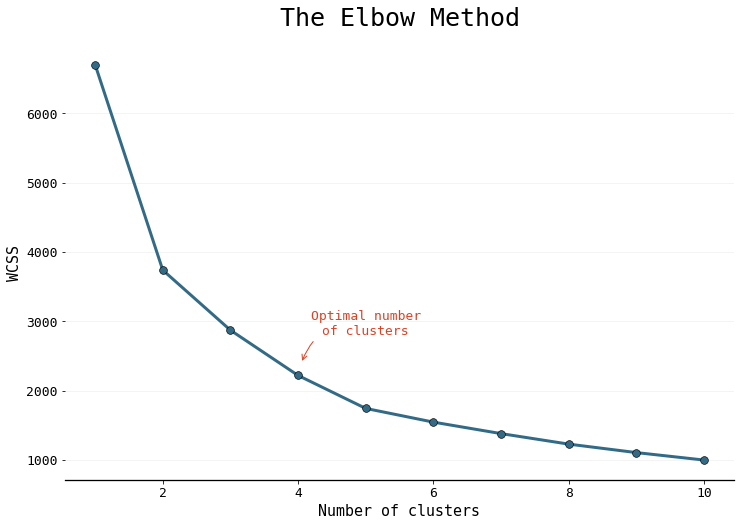

In [49]:
# Elbow Method

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(cust_clust)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 15, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 15, fontname = 'monospace')
plt.xticks(size = 13, fontname = 'monospace')
plt.yticks(size = 13, fontname = 'monospace')

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
a.spines['bottom'].set_linewidth(1.3)
a.spines['left'].set_linewidth(1.3)

plt.annotate('''Optimal number
of clusters''', xy = (4.05, 2400), xytext = (5, 2800),
             arrowprops = dict(facecolor = 'steelblue', arrowstyle = "->", connectionstyle = "arc3,rad = 0.4",color = '#dd4124'), 
             fontsize = 13, fontfamily = 'monospace', ha = 'center', color = '#dd4124')

plt.show()

In [52]:
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(cust_clust)
labels = gmm.predict(cust_clust)

cust['Cluster'] = labels
re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
cust['Cluster'] = cust['Cluster'].map(re_clust)


In [53]:
# Number of clients by cluster

fig = px.pie(cust['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of clients <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

In [54]:
# Customers clusters

plot = go.Figure()

colors = ['#b4b4b4', '#dd4124', '#009473', '#336b87']
names = ['Ordinary client', 'Elite client', 'Good client', 'Potential good client']

for i in range(4):
    cl = names[i]
    plot.add_trace(go.Scatter3d(x = cust.query("Cluster == @cl")['NumAllPurchases'],
                                y = cust.query("Cluster == @cl")['AverageCheck'],
                                z = cust.query("Cluster == @cl")['Days_is_client'],
                                mode = 'markers',
                                name = names[i],
                                marker = dict(
                                    size = 2,
                                    color = colors[i],  
                                    opacity = 0.6)))

plot.update_traces(hovertemplate = 'Purchases: %{x} <br>Average Check: %{y} <br>Days is client: %{z}')

plot.update_layout(width = 800, height = 800, autosize = True, showlegend = False,
                   scene = dict(xaxis = dict(title = 'Count of purchases', titlefont_color = 'black'),
                                yaxis = dict(title = 'Average check', titlefont_color = 'black'),
                                zaxis = dict(title = 'Days is client', titlefont_color = 'black')),
                   font = dict(family = "monospace", color  = 'black', size = 14),
                   title_text = 'Customers clusters', title_x = 0.5)

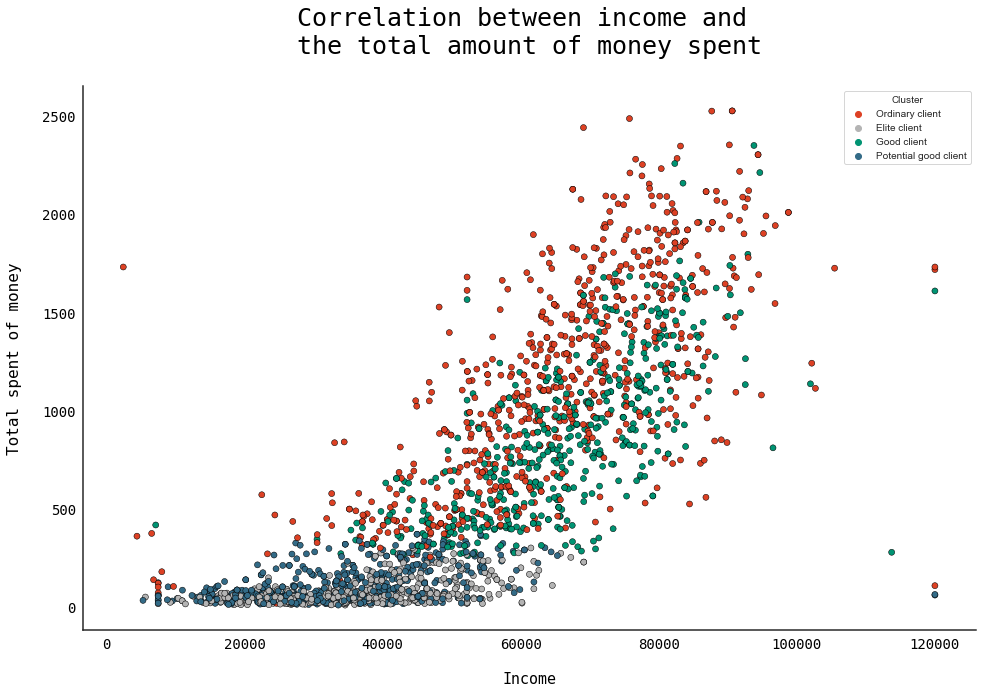

In [55]:
# Correlation between income and the total amount of money spent

plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''Correlation between income and 
the total amount of money spent''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = cust, x = "Income", y = "MntTotal", hue = "Cluster", palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Income', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Total spent of money', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

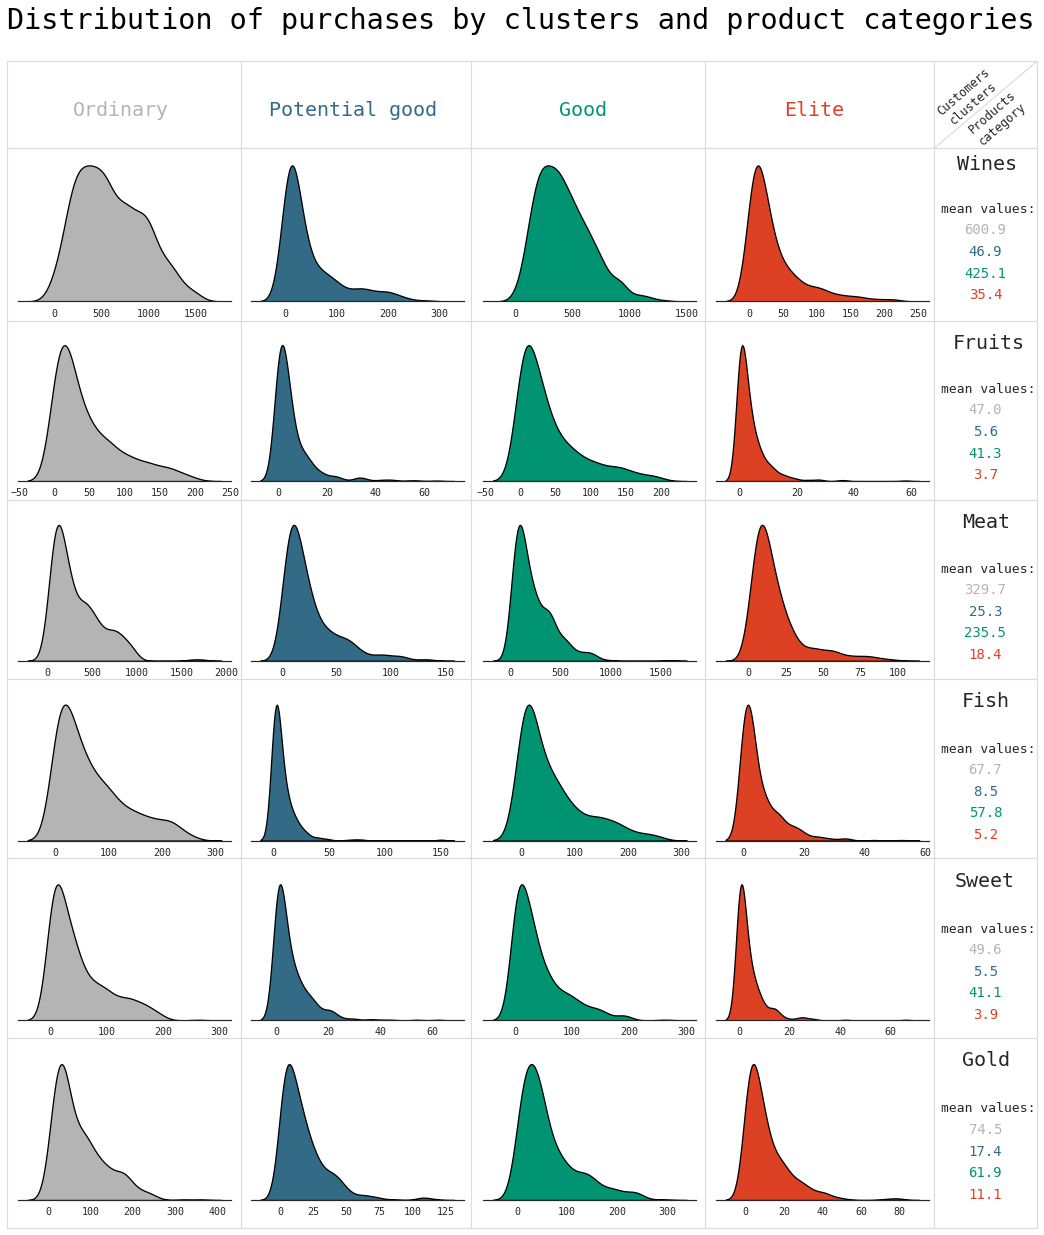

In [56]:
# Ditribution of purchases by clusters and product categories

cust = cust.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweet', 
                       'MntGoldProds': 'Gold'})

cl = ['Ordinary client', 'Potential good client', 'Good client', 'Elite client']
colors = {
    'Ordinary client': '#b4b4b4',
    'Potential good client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

fig = plt.figure(figsize = (13, 15))
p = 1
for i in range(len(cust.columns.tolist()[4:10])):
    for k in cl:
        plt.subplot(6, 4, p)
        sns.set_style("white")
        a = sns.kdeplot(cust.query("Cluster == @k")[cust.columns.tolist()[4:10][i]], color = colors[k], alpha = 1, shade = True, linewidth = 1.3, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        p += 1  

plt.figtext(0., 1.11, 'Distribution of purchases by clusters and product categories', fontname = 'monospace', size = 28.5, color = 'black')        

plt.figtext(0.07, 1.03, 'Ordinary', fontname = 'monospace', size = 20, color = '#b4b4b4')      
plt.figtext(0.28, 1.03, 'Potential good', fontname = 'monospace', size = 20, color = '#336b87') 
plt.figtext(0.59, 1.03, 'Good', fontname = 'monospace', size = 20, color = '#009473') 
plt.figtext(0.83, 1.03, 'Elite', fontname = 'monospace', size = 20, color = '#dd4124') 

plt.figtext(1.015, 0.98, 'Wines', fontname = 'monospace', size = 20)   
plt.figtext(1.01, 0.814, 'Fruits', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.648, 'Meat', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.482, 'Fish', fontname = 'monospace', size = 20)
plt.figtext(1.012, 0.316, 'Sweet', fontname = 'monospace', size = 20)
plt.figtext(1.02, 0.15, 'Gold', fontname = 'monospace', size = 20)

l1 = lines.Line2D([0.99, 0.99], [1.08, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l1])
l2 = lines.Line2D([0.0, 1.1], [1, 1], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l2])
l3 = lines.Line2D([0.991, 1.1], [1, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l3])
l4 = lines.Line2D([0, 1.1], [1.08, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l4])
l5 = lines.Line2D([1.1, 1.1], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l5])
l6 = lines.Line2D([0, 0], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l6])
l7 = lines.Line2D([0, 1.1], [0, 0], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l7])
l8 = lines.Line2D([0, 1.1], [0.84, 0.84], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l8])
l9 = lines.Line2D([0, 1.1], [0.674, 0.674], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l9])
l10 = lines.Line2D([0, 1.1], [0.508, 0.508], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l10])
l11 = lines.Line2D([0, 1.1], [0.342, 0.342], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l11])
l12 = lines.Line2D([0, 1.1], [0.176, 0.176], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l12])
l13 = lines.Line2D([0.25, 0.25], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l13])
l14 = lines.Line2D([0.495, 0.495], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l14])
l15 = lines.Line2D([0.745, 0.745], [0, 1.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.2)
fig.lines.extend([l15])

plt.figtext(1.027, 1.02, '''Customers
clusters''', fontname = 'monospace', size = 12, rotation = 41, ha = 'center')   
plt.figtext(1.025, 1.003, '''Products
category''', fontname = 'monospace', size = 12, rotation = 41)

y = 0.94
for i in range(6):
    plt.figtext(0.998, y, 'mean values:', fontname = 'monospace', size = 13)
    y -= 0.1666
    
y = 0.92
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, round(cust.query("Cluster == 'Ordinary client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#b4b4b4', ha = 'center')
    y -= 0.1666
    
y = 0.9
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, round(cust.query("Cluster == 'Potential good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#336b87', ha = 'center')
    y -= 0.1666
    
y = 0.88
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, round(cust.query("Cluster == 'Good client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#009473', ha = 'center')
    y -= 0.1666
    
y = 0.86
for i in cust.columns.tolist()[4:10]:
    plt.figtext(1.045, y, round(cust.query("Cluster == 'Elite client'")[i].mean(), 1), fontname = 'monospace', size = 14, color = '#dd4124', ha = 'center')
    y -= 0.1666

fig.tight_layout(h_pad = 2)
plt.show()

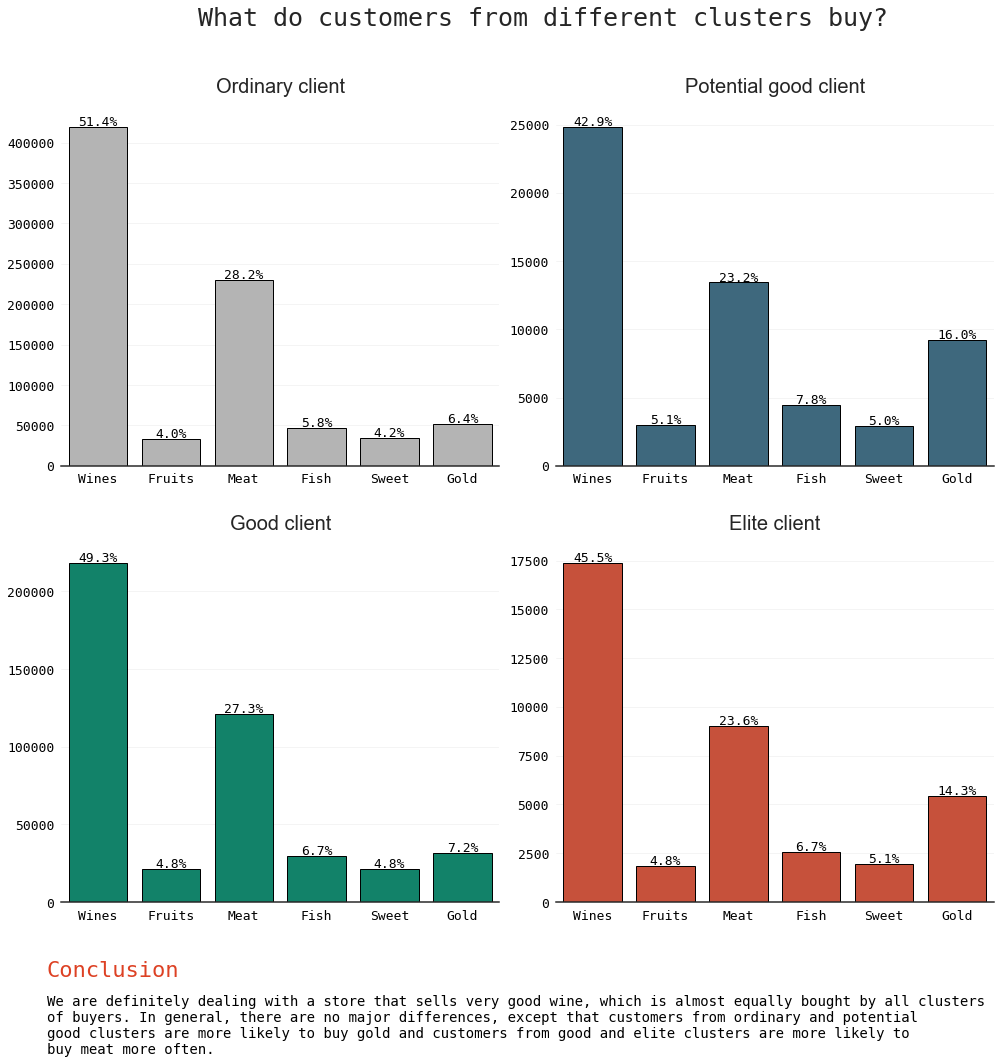

In [57]:
# What do customers from different clusters buy?

fig = plt.figure(figsize = (14, 12))
k = 1

for i in cl:
    ass = cust.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i], linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 13,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    
plt.figtext(0.05, -0.05, 'Conclusion', fontname = 'monospace', size = 22, color = '#dd4124')
plt.figtext(0.05, -0.14, '''We are definitely dealing with a store that sells very good wine, which is almost equally bought by all clusters
of buyers. In general, there are no major differences, except that customers from ordinary and potential
good clusters are more likely to buy gold and customers from good and elite clusters are more likely to
buy meat more often.''', fontname = 'monospace', size = 14, color = 'black')
    
plt.figtext(0.2, 1.05, 'What do customers from different clusters buy?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

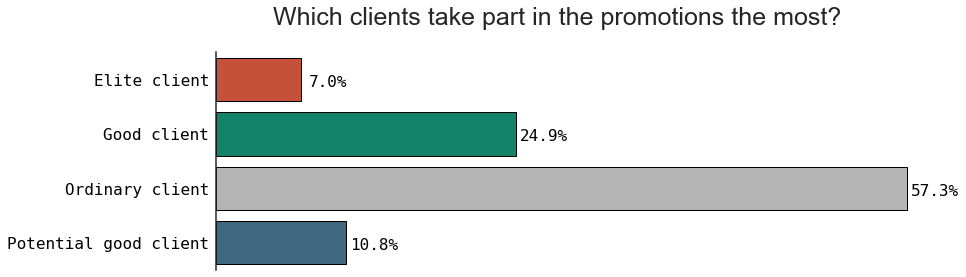

In [58]:
# Which clients take part in the promotions the most?

fig = plt.figure(figsize = (13, 4))
palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87']
plt.title('Which clients take part in the promotions the most?', size = 25, x = 0.47, y = 1.1)
a = sns.barplot(data = cust.groupby(['Cluster']).agg({'TotalAcceptedCmp': 'sum'}).reset_index(), 
                x = 'TotalAcceptedCmp', y = 'Cluster', palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(23 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 1001) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

plt.show()

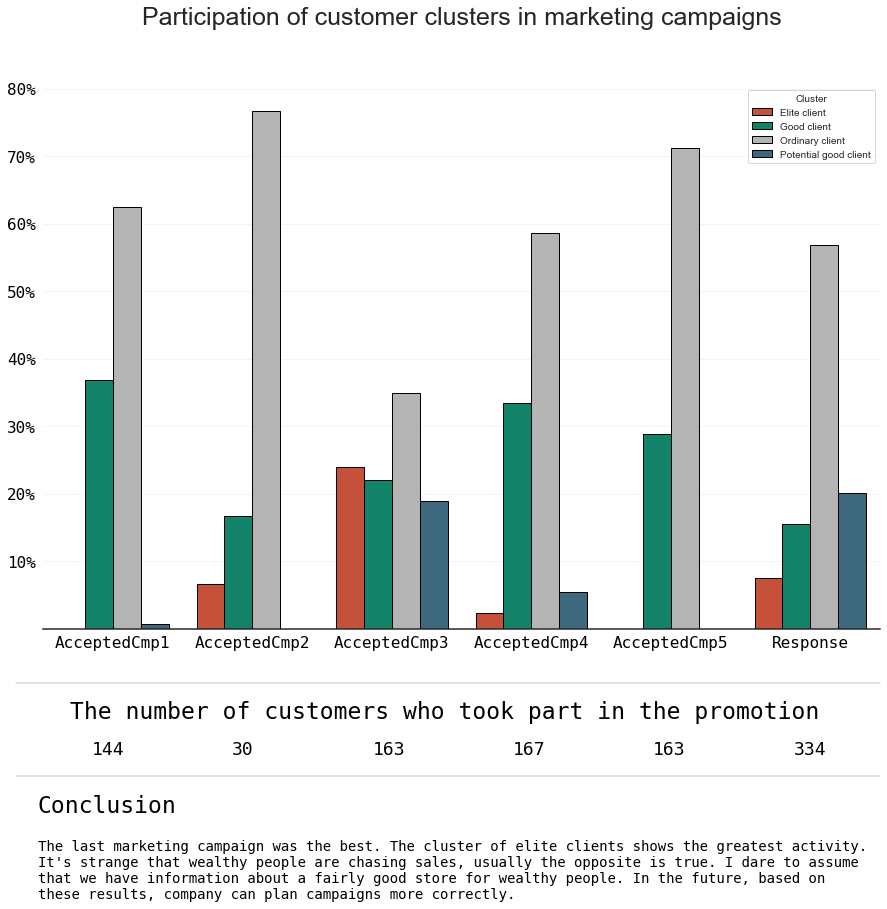

In [59]:
# Participation of customer clusters in marketing campaigns

df = cust.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'})
df['sum'] = df.groupby(['Cmp'])['value'].transform('sum')
df['percentage'] = round(df['value'] / df['sum'] * 100, 1)

fig = plt.figure(figsize = (15, 10))
plt.title('Participation of customer clusters in marketing campaigns', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
a = sns.barplot(data = df, x = 'Cmp', y = 'percentage', hue = 'Cluster', dodge = True, palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

a.yaxis.set_major_formatter(FixedFormatter(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%']))
a.yaxis.set_major_locator(FixedLocator([10, 20, 30, 40, 50, 60, 70, 80]))

for j in ['right', 'top', 'left']:
    a.spines[j].set_visible(False)
for j in ['bottom']:
    a.spines[j].set_linewidth(1.5)

l1 = lines.Line2D([0.1, 0.9], [0.05, 0.05], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(0.15, 0, 'The number of customers who took part in the promotion', fontname = 'monospace', size = 23, color = 'black')

x = 0.17
for i in df[:6]['sum'].tolist():
    plt.figtext(x, -0.05, i, fontname = 'monospace', size = 18, color = 'black')
    x += 0.13

l2 = lines.Line2D([0.1, 0.9], [-0.08, -0.08], transform = fig.transFigure, figure = fig, color = '#dbdbdb', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(0.12, -0.13, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(0.12, -0.25, '''The last marketing campaign was the best. The cluster of elite clients shows the greatest activity.
It's strange that wealthy people are chasing sales, usually the opposite is true. I dare to assume
that we have information about a fairly good store for wealthy people. In the future, based on
these results, company can plan campaigns more correctly.''', fontname = 'monospace', size = 14, color = 'black')


plt.show()

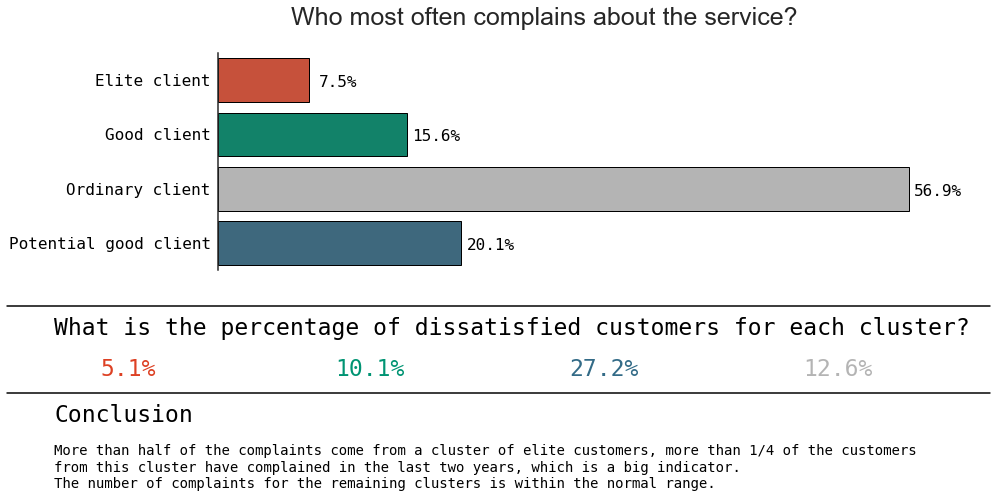

In [60]:
# Who most often complains about the service?

fig = plt.figure(figsize = (13, 4))
plt.title('Who most often complains about the service?', size = 25, x = 0.45, y = 1.1)
a = sns.barplot(data = cust.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster', palette = palette, linestyle = "-", linewidth = 1, edgecolor = "black")
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')

for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, 'What is the percentage of dissatisfied customers for each cluster?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(cust.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.24, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.3, -0.3], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])

plt.figtext(-0.05, -0.4, 'Conclusion', fontname = 'monospace', size = 23, color = 'black')
plt.figtext(-0.05, -0.63, '''More than half of the complaints come from a cluster of elite customers, more than 1/4 of the customers
from this cluster have complained in the last two years, which is a big indicator.
The number of complaints for the remaining clusters is within the normal range.''', fontname = 'monospace', size = 14, color = 'black')

plt.show()